#### Probability_theory


In [1]:
import numpy as np
import scipy.stats as stats

# 1. Probability Distributions
# Example: Normal Distribution
mu, sigma = 0, 1  # Mean and standard deviation
normal_dist = stats.norm(mu, sigma)
x = np.linspace(-4, 4, 100)
pdf = normal_dist.pdf(x)  # Probability Density Function (PDF)
cdf = normal_dist.cdf(x)  # Cumulative Distribution Function (CDF)

# 2. Joint Probability
# Example: Joint probability of two independent normal distributions
mu1, sigma1, mu2, sigma2 = 0, 1, 1, 2
dist1 = stats.norm(mu1, sigma1)
dist2 = stats.norm(mu2, sigma2)
joint_prob = np.outer(dist1.pdf(x), dist2.pdf(x))  # Outer product for joint probability

# 3. Conditional Probability
# P(A|B) = P(A and B) / P(B)
def conditional_probability(p_a_and_b, p_b):
    return p_a_and_b / p_b if p_b > 0 else 0

p_a = 0.5
p_b = 0.6
p_a_and_b = 0.3
p_a_given_b = conditional_probability(p_a_and_b, p_b)

# 4. Bayes’ Theorem
# P(A|B) = P(B|A) * P(A) / P(B)
def bayes_theorem(p_b_given_a, p_a, p_b):
    return (p_b_given_a * p_a) / p_b if p_b > 0 else 0

p_b_given_a = 0.8
p_a = 0.4
p_b = 0.5
p_a_given_b_bayes = bayes_theorem(p_b_given_a, p_a, p_b)

# 5. Expectation and Variance
# Expectation E[X] = sum x * P(x)
def expectation(values, probabilities):
    return np.sum(values * probabilities)

def variance(values, probabilities):
    mean = expectation(values, probabilities)
    return np.sum(((values - mean) ** 2) * probabilities)

values = np.array([1, 2, 3, 4])
probabilities = np.array([0.1, 0.3, 0.4, 0.2])
expected_value = expectation(values, probabilities)
variance_value = variance(values, probabilities)

# 6. KL-Divergence and Entropy
# Entropy: H(X) = -sum P(x) log P(x)
def entropy(probabilities):
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))

# KL-Divergence: D_KL(P || Q) = sum P(x) log(P(x)/Q(x))
def kl_divergence(p, q):
    return np.sum(p * np.log2(p / (q + 1e-9)))

p = np.array([0.1, 0.4, 0.5])
q = np.array([0.2, 0.3, 0.5])
entropy_p = entropy(p)
kl_div_pq = kl_divergence(p, q)

# 7. Maximum Likelihood Estimation (MLE)
def mle_normal(data):
    mu_mle = np.mean(data)
    sigma_mle = np.std(data, ddof=1)
    return mu_mle, sigma_mle

data_sample = np.random.normal(0, 1, 1000)
mle_mu, mle_sigma = mle_normal(data_sample)

#### Machine Learning

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


MSE: 0.6536995137170025
Ridge MSE: 0.6476132373054256
Logistic Regression Accuracy: 1.0


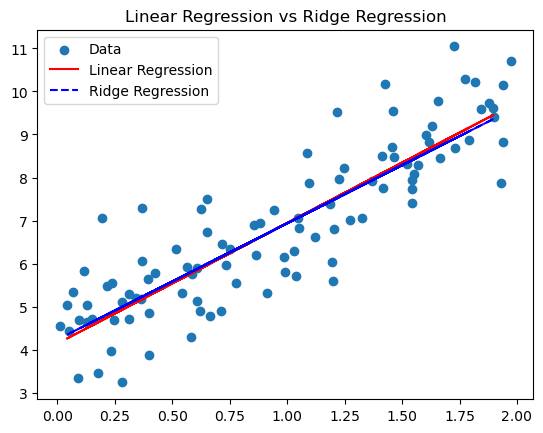

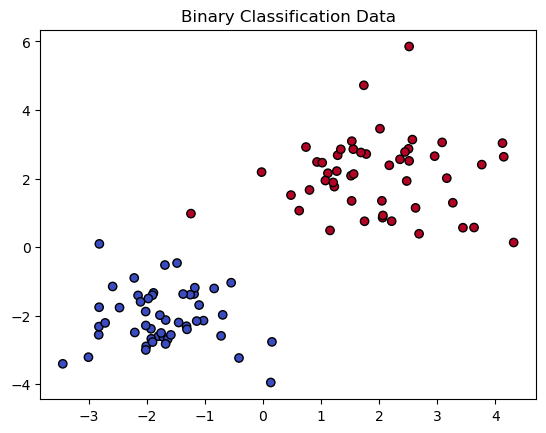

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. 데이터 생성 (선형 회귀)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 2. 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 선형 회귀 모델 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

# 4. 정규화 적용 (L2 정규화 Ridge Regression)
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)
y_ridge_pred = ridge_reg.predict(X_test)
print("Ridge MSE:", mean_squared_error(y_test, y_ridge_pred))

# 5. 로지스틱 회귀 (이진 분류)
X_class = np.vstack([np.random.randn(50, 2) + [2, 2], np.random.randn(50, 2) + [-2, -2]])
y_class = np.hstack([np.ones(50), np.zeros(50)])

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

log_reg = LogisticRegression()
log_reg.fit(X_train_class, y_train_class)
y_class_pred = log_reg.predict(X_test_class)
print("Logistic Regression Accuracy:", accuracy_score(y_test_class, y_class_pred))

# 6. 시각화
plt.scatter(X, y, label='Data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression')
plt.plot(X_test, y_ridge_pred, color='blue', linestyle='dashed', label='Ridge Regression')
plt.legend()
plt.title("Linear Regression vs Ridge Regression")
plt.show()

# 7. 로지스틱 회귀 시각화
plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap='coolwarm', edgecolors='k')
plt.title("Binary Classification Data")
plt.show()


#### Deep Feedforward Networks

/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <A51C8C05-245A-3989-8D3C-9A6704422CA5> /Users/jaeminiman/anaconda3/envs/pytorch/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:15<00:00, 631047.81it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 135288.64it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:01<00:00, 1532091.78it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 1058010.04it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/10, Loss: 0.3036
Epoch 2/10, Loss: 0.1372
Epoch 3/10, Loss: 0.1012
Epoch 4/10, Loss: 0.0840
Epoch 5/10, Loss: 0.0677
Epoch 6/10, Loss: 0.0612
Epoch 7/10, Loss: 0.0522
Epoch 8/10, Loss: 0.0486
Epoch 9/10, Loss: 0.0419
Epoch 10/10, Loss: 0.0381
Test Accuracy: 97.68%


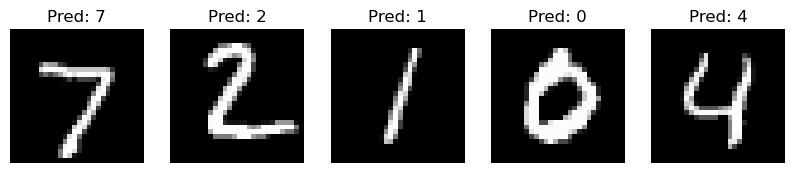

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. 데이터 준비 (MNIST 데이터셋 로드)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# 2. MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# 3. 모델, 손실 함수, 옵티마이저 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. 모델 학습
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

# 5. 모델 평가
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

# 6. 일부 예제 이미지 예측 시각화
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    img = images[i].cpu().numpy().squeeze()
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Pred: {predicted[i].item()}")
    axes[i].axis('off')
plt.show()

#### Regularization for Deep Learning

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드 및 변환 (Normalization 포함)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# CNN 모델 정의
class CNN(nn.Module):
    def __init__(self, dropout_rate=0.0):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# 모델 학습 함수
def train_model(model, criterion, optimizer, num_epochs=5, l1_lambda=0.0):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # L1 Regularization
            if l1_lambda > 0:
                l1_norm = sum(p.abs().sum() for p in model.parameters())
                loss += l1_lambda * l1_norm
            
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}')

# 모델 평가 함수
def evaluate_model(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')

# GPU 사용 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 정규화 기법 별 모델 학습 및 평가
print("Baseline Model (No Regularization)")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model(model, criterion, optimizer, num_epochs=5)
evaluate_model(model)

print("Model with L2 Regularization (Weight Decay)")
model_l2 = CNN().to(device)
optimizer_l2 = optim.Adam(model_l2.parameters(), lr=0.001, weight_decay=0.01)
train_model(model_l2, criterion, optimizer_l2, num_epochs=5)
evaluate_model(model_l2)

print("Model with L1 Regularization")
model_l1 = CNN().to(device)
optimizer_l1 = optim.Adam(model_l1.parameters(), lr=0.001)
train_model(model_l1, criterion, optimizer_l1, num_epochs=5, l1_lambda=0.01)
evaluate_model(model_l1)

print("Model with Dropout (p=0.5)")
model_dropout = CNN(dropout_rate=0.5).to(device)
optimizer_dropout = optim.Adam(model_dropout.parameters(), lr=0.001)
train_model(model_dropout, criterion, optimizer_dropout, num_epochs=5)
evaluate_model(model_dropout)


Baseline Model (No Regularization)
Epoch 1, Loss: 0.1581
Epoch 2, Loss: 0.0446
Epoch 3, Loss: 0.0307
Epoch 4, Loss: 0.0221
Epoch 5, Loss: 0.0175
Accuracy: 99.05%
Model with L2 Regularization (Weight Decay)
Epoch 1, Loss: 0.2005
Epoch 2, Loss: 0.1112
Epoch 3, Loss: 0.1027
Epoch 4, Loss: 0.0984
Epoch 5, Loss: 0.0937
Accuracy: 97.86%
Model with L1 Regularization
Epoch 1, Loss: 3.3569
Epoch 2, Loss: 2.8222
Epoch 3, Loss: 2.8222
Epoch 4, Loss: 2.8221
Epoch 5, Loss: 2.8221
Accuracy: 11.35%
Model with Dropout (p=0.5)
Epoch 1, Loss: 0.2588
Epoch 2, Loss: 0.0923
Epoch 3, Loss: 0.0689
Epoch 4, Loss: 0.0555
Epoch 5, Loss: 0.0468
Accuracy: 98.09%


#### Optimization for Training Deep Models

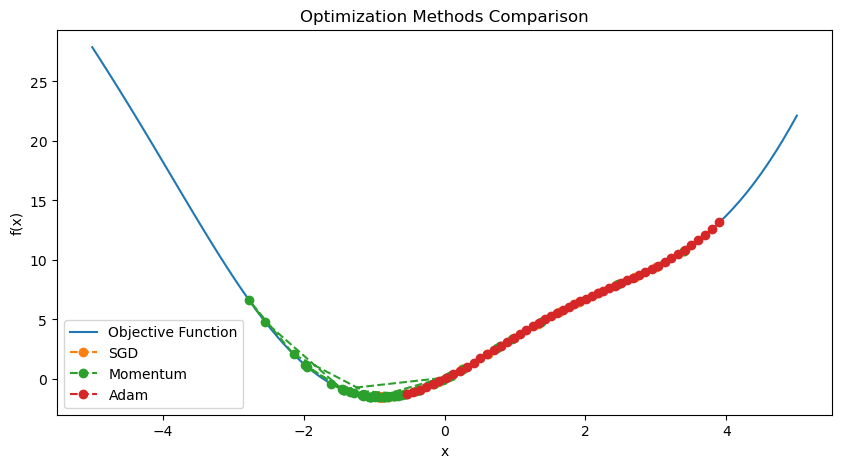

In [5]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# 목표 함수: f(x) = x^2 + 3sin(x)
def objective_function(x):
    return x**2 + 3 * torch.sin(x)

# 미분값 (gradient)
def gradient(x):
    return 2*x + 3 * torch.cos(x)

# 최적화 알고리즘 비교
optimizers = {
    "SGD": lambda params: optim.SGD(params, lr=0.1),
    "Momentum": lambda params: optim.SGD(params, lr=0.1, momentum=0.9),
    "Adam": lambda params: optim.Adam(params, lr=0.1)
}

# 초기값 설정
initial_x = torch.tensor([4.0], requires_grad=True)

# 학습 진행
num_epochs = 50
results = {}

for name, optimizer_fn in optimizers.items():
    x = initial_x.clone().detach().requires_grad_(True)
    optimizer = optimizer_fn([x])
    
    trajectory = []  # 학습 과정 기록
    for _ in range(num_epochs):
        optimizer.zero_grad()
        loss = objective_function(x)
        loss.backward()
        optimizer.step()
        trajectory.append(x.item())

    results[name] = trajectory

# 결과 시각화
x_vals = torch.linspace(-5, 5, 100)
y_vals = objective_function(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals.numpy(), y_vals.numpy(), label="Objective Function")

for name, trajectory in results.items():
    plt.plot(trajectory, [objective_function(torch.tensor([t])).item() for t in trajectory], marker="o", linestyle="--", label=name)

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Optimization Methods Comparison")
plt.show()